# Kmeans and Hierarchical Clustering on Wine dataset

In [2]:
# Importing library
# Adding Preliminary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Importing Dataset
#To demonstrate various clustering algorithms in python, the Wine dataset will be used which has three classes in the dependent variable and using this dataset clusters will be formed.

from sklearn import datasets
wine = datasets.load_wine()
wine_data = pd.DataFrame(wine.data)
wine_data.columns = wine.feature_names
wine_data['Type']=wine.target
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
#Preparing Data
#Here we have the target variable ‘Type’. We need to remove the target variable so that this dataset can be used to work in an unsupervised learning environment. The iloc function is used to get the features we require. We also use .values function to get an array of the dataset.
#(Note that we transformed the dataset to an array so that we can plot the graphs of the clusters).

wine_X = wine_data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values

In [5]:
# Now we will separate the target variable from the original dataset and again convert it to an array by using numpy.

wine_Y = wine_data['Type']
wine_Y = np.array(wine_Y)

# Wine dataset clustering plot

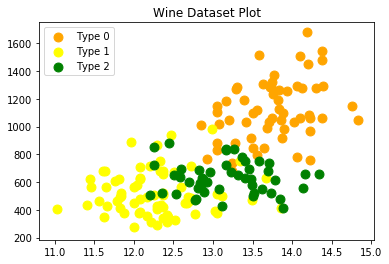

In [14]:
# Visualise Classes
#In this Wine dataset, we have three classes. We visualise these classes in a 2-D graph.

plt.scatter(wine_X[wine_Y == 0, 0], wine_X[wine_Y == 0, 12], s = 80, c = 'orange', label = 'Type 0')
plt.scatter(wine_X[wine_Y == 1, 0], wine_X[wine_Y == 1, 12], s = 80, c = 'yellow', label = 'Type 1')
plt.scatter(wine_X[wine_Y == 2, 0], wine_X[wine_Y == 2, 12], s = 80, c = 'green', label = 'Type 2')

plt.title("Wine Dataset Plot")
plt.legend()

# Kmeans Clustering for Wine Dataset

In [17]:
# Wine dataset for KMeans

'''Kmeans is a kind of Unsupervised type of Clustering . It basically takes input from Dataset and predicts the clusters 
accordinly'''

from sklearn.cluster import KMeans

In [18]:
# Calculating WCSS (within-cluster sums of squares) 

wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(wine_X)
    wcss.append(kmeans.inertia_)

# Elbow plot (Kmeans) for Wine dataset

Text(0, 0.5, 'WCSS')

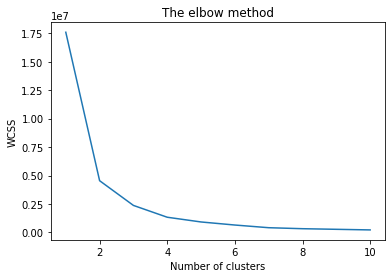

In [19]:
# Plot the WCSS
'''Elbow-Method using WCSS: This is based on principle that while clustering performance as measured by WCSS increases (i.e. WCSS decreases) 
with increase in k, rate of increase is usually decreasing. So performance improvement for increasing number of cluster 
from, say, 3 to 4 is higher than that for increasing from 4 to 5. '''

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [20]:
# Running K-Means Model

cluster_Kmeans = KMeans(n_clusters=5)
model_kmeans = cluster_Kmeans.fit(wine_X)
pred_kmeans = model_kmeans.labels_
pred_kmeans

array([0, 0, 0, 3, 2, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 2, 2, 2,
       0, 0, 2, 2, 0, 3, 2, 0, 3, 3, 0, 3, 0, 2, 2, 0, 0, 2, 2, 0, 0, 4,
       2, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 3, 1, 4, 1, 4, 1, 1, 4,
       1, 1, 2, 4, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 4, 4, 1, 1, 1, 1, 4,
       4, 4, 1, 1, 1, 1, 1, 2, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 1, 1, 4,
       4, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1,
       4, 4, 4, 4, 4, 1, 4, 4, 4, 2, 1, 4, 2, 2, 1, 4, 4, 4, 1, 1, 1, 4,
       4, 4, 1, 2, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 2, 4, 1, 1, 4, 2, 2, 2,
       2, 4])

# Kmeans Clustering plot for Wine dataset

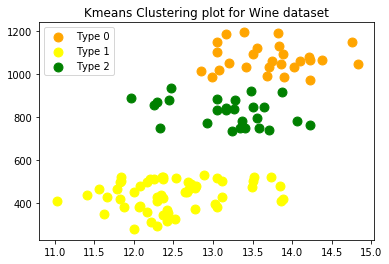

In [21]:
# Visualizing Output
# In the above output we got value labels: ‘0’, ‘1’  and ‘2’. For a better understanding, we can visualize these clusters.

plt.scatter(wine_X[pred_kmeans == 0, 0], wine_X[pred_kmeans == 0, 12], s = 80, c = 'orange', label = 'Type 0')
plt.scatter(wine_X[pred_kmeans == 1, 0], wine_X[pred_kmeans == 1, 12], s = 80, c = 'yellow', label = 'Type 1')
plt.scatter(wine_X[pred_kmeans == 2, 0], wine_X[pred_kmeans == 2, 12], s = 80, c = 'green', label = 'Type 2')

plt.title('Kmeans Clustering plot for Wine dataset')
plt.legend()

In [1]:
# Importing Libraries for Modelling.

from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [77]:
X, y = wine.data[:, :], wine.target

#Setting training and testing values

Xtrain, Xtest, y_train, y_test = train_test_split(X, y)
scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

# Modeling is done using KNN classifiers.
knn = neighbors.KNeighborsClassifier(n_neighbors=4)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)

print('Accuracy Score', accuracy_score(y_test, y_pred))
print('Confusion matrix',  confusion_matrix(y_test, y_pred))
print('Classification', classification_report(y_test, y_pred))

Accuracy Score 0.9555555555555556
Confusion matrix [[15  0  0]
 [ 1 19  1]
 [ 0  0  9]]
Classification               precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.90      0.95        21
           2       0.90      1.00      0.95         9

    accuracy                           0.96        45
   macro avg       0.95      0.97      0.96        45
weighted avg       0.96      0.96      0.96        45



In [79]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.9305555555555556

In [26]:
X, y = wine.data[:, :], wine.target
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Logistic Regression Accuracy 

In [27]:
#Logistic Regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Logistic Regression :")
print("Accuracy = ", accuracy)
print(cm)

Logistic Regression :
Accuracy =  0.9444444444444444
[[13  1  0]
 [ 0 15  1]
 [ 0  0  6]]


C:\Users\Ayantika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ayantika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Cohen Kappa Accuracy for LR

In [28]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.9117647058823529

# K-Nearest Neighbors Accuracy

In [29]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("K Nearest Neighbors :")
print("Accuracy = ", accuracy)
print(cm)

K Nearest Neighbors :
Accuracy =  0.8055555555555556
[[13  0  1]
 [ 0 14  2]
 [ 2  2  2]]


# Cohen Kappa Accuracy for KNN

In [30]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.685

# Support Vector Machine Accuracy

In [79]:
#Support Vector Machine
from sklearn.svm import SVC
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
classifier = SVC()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Support Vector Machine:")
print("Accuracy = ", accuracy)
print(cm)

Support Vector Machine:
Accuracy =  0.5277777777777778
[[ 1 13  0]
 [ 0 16  0]
 [ 0  4  2]]


C:\Users\Ayantika\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Cohen Kappa Accuracy for SVM

In [80]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.17520215633423175

# Gaussian Naive Bayes Accuracy

In [81]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Gaussian Naive Bayes :")
print("Accuracy = ", accuracy)
print(cm)

Gaussian Naive Bayes :
Accuracy =  0.9166666666666666
[[14  0  0]
 [ 2 13  1]
 [ 0  0  6]]


# Cohen Kappa Accuracy for GNB

In [82]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.8686131386861313

# Decision Tree Classifier Accuracy

In [83]:
#Decision Tree Classifier
from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

classifier = DT(criterion='entropy', random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
print("Decision Tree Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Decision Tree Classifier :
Accuracy =  0.9166666666666666
[[13  1  0]
 [ 1 14  1]
 [ 0  0  6]]


# Cohen Kappa Accuracy for DTC

In [84]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.8679706601466992

# Random Forest Classifier Accuracy

In [85]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as RF

classifier = RF(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
print("Random Forest Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Random Forest Classifier :
Accuracy =  0.9166666666666666
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


# Cohen Kappa Accuracy for RFC

In [86]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.9555555555555556

# Hierarchical clustering Analysis (HCA)

In [39]:
# Hierarchical Clustering
''' Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. It is aka Hierarchicla 
CLustering Analysis(HCA)'''

# Import Library
import matplotlib.pyplot as plt  
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_wine


# Hierarchical Dendrogram plot for Wine dataset

In [40]:
# Plotting of Dendrogram

import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidean distance in the space with other variables')

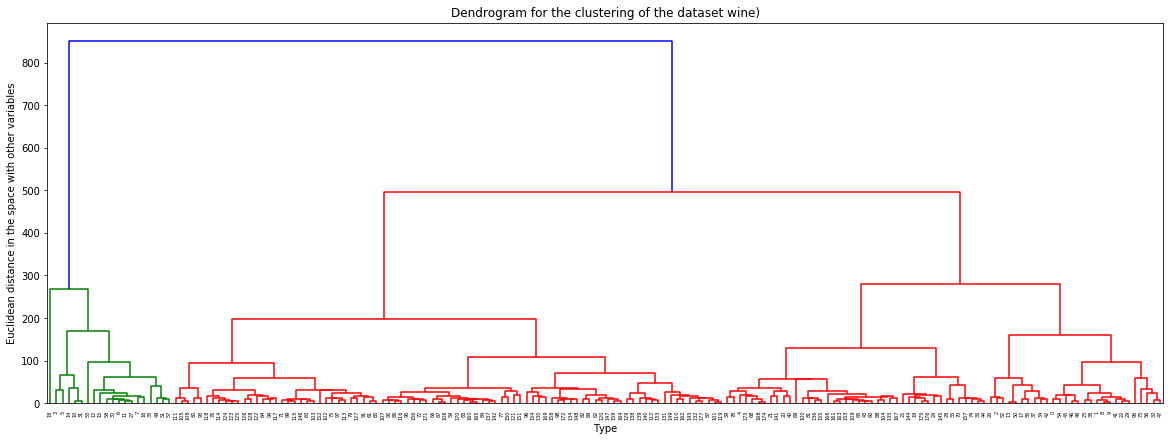

In [41]:
#Decide the number of clusters by using this dendrogram
Z = sch.linkage(wine_X, method = 'median')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z)
plt.title('Dendrogram for the clustering of the dataset wine)')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')

In [42]:
# Building an Agglomerative Clustering Model

#Initialise Model

cluster_H = AgglomerativeClustering(n_clusters=3)
# Modelling the data
model_clt = cluster_H.fit(wine_X)
model_clt
pred1 = model_clt.labels_
pred1

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int64)

# Hierarchical cluster plot for Wine dataset

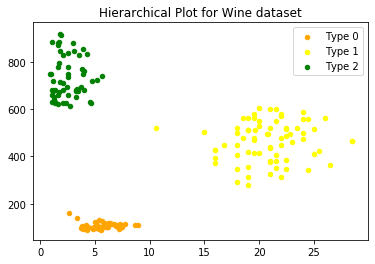

In [43]:
# Plotting the HCA Cluster

plt.scatter(wine_X[pred1 == 0, 9], wine_X[pred1 == 0, 4], s = 20, c = 'orange', label = 'Type 0')
plt.scatter(wine_X[pred1 == 1, 3], wine_X[pred1 == 1, 12], s = 20, c = 'yellow', label = 'Type 1')
plt.scatter(wine_X[pred1 == 2, 1], wine_X[pred1 == 2, 12], s = 20, c = 'green', label = 'Type 2')
plt.title('Hierarchical Plot for Wine dataset')
plt.legend()

In [45]:

import sklearn.metrics as sm

target = pd.DataFrame(wine.target)
#based on the dendrogram we have two clusetes 
k =3 
#build the model
HClustering = AgglomerativeClustering(n_clusters=k , affinity="euclidean",linkage="ward")
#fit the model on the dataset
HClustering.fit(wine_X)
#accuracy of the model
sm.accuracy_score(target,HClustering.labels_)

0.6966292134831461

In [46]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

1.0

In [47]:
X, y = wine.data[:, :], wine.target
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

# Logistic Regression Accuracy 

In [48]:
#Logistic Regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Logistic Regression :")
print("Accuracy = ", accuracy)
print(cm)

Logistic Regression :
Accuracy =  0.9252336448598131
[[33  1  0]
 [ 5 39  2]
 [ 0  0 27]]


C:\Users\Ayantika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ayantika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Cohen Kappa Accuracy for LR

In [49]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.8863817361295461

# K-Nearest Neighbors Accuracy

In [50]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
Xtrain, Xtest, y_train, y_test = train_test_split(X, y)
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("K Nearest Neighbors :")
print("Accuracy = ", accuracy)
print(cm)

K Nearest Neighbors :
Accuracy =  0.8222222222222222
[[16  0  0]
 [ 0 17  2]
 [ 2  4  4]]


# Cohen Kappa Accuracy for KNN

In [51]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.7183098591549295

# Support Vector Machine Accuracy

In [96]:
#Support Vector Machine
from sklearn.svm import SVC
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
classifier = SVC(random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Support Vector Machine:")
print("Accuracy = ", accuracy)
print(cm)

Support Vector Machine:
Accuracy =  0.5
[[0 6 0]
 [0 7 0]
 [0 3 2]]


C:\Users\Ayantika\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Cohen Kappa Accuracy for SVM

In [97]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.19801980198019797

# Gaussian Naive Bayes Accuracy

In [114]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
Xtrain, Xtest, y_train, y_test = train_test_split(X, y)
classifier = GaussianNB()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Gaussian Naive Bayes :")
print("Accuracy = ", accuracy)
print(cm)

Gaussian Naive Bayes :
Accuracy =  0.9111111111111111
[[19  1  0]
 [ 0 13  3]
 [ 0  0  9]]


# Cohen Kappa Accuracy for GNB

In [116]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.8629093678598629

# Decision Tree Classifier Accuracy

In [108]:
#Decision Tree Classifier
from sklearn.model_selection import train_test_split
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

classifier = DT(criterion='entropy', random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
print("Decision Tree Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Decision Tree Classifier :
Accuracy =  0.9444444444444444
[[18  1  0]
 [ 1 20  1]
 [ 0  0 13]]


# Cohen Kappa Accuracy for DTC

In [109]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.9152276295133438

# Random Forest Classifier Accuracy

In [112]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as RF
Xtrain, Xtest, y_train, y_test = train_test_split(X, y)
classifier = RF(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
print("Random Forest Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Random Forest Classifier :
Accuracy =  0.9444444444444444
[[15  0  0]
 [ 1 14  0]
 [ 0  0 15]]


# Cohen Kappa Accuracy for RFC

In [113]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.9666666666666667